# Module 03: EDA

In [1]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [2]:
# Load the data
Hitters = load_data('Hitters')

### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [3]:
#fillin
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [10]:
for col in Hitters.columns:
    print(col,Hitters[col].dtype)

AtBat int64
Hits int64
HmRun int64
Runs int64
RBI int64
Walks int64
Years int64
CAtBat int64
CHits int64
CHmRun int64
CRuns int64
CRBI int64
CWalks int64
League category
Division category
PutOuts int64
Assists int64
Errors int64
Salary float64
NewLeague category


### Before doing any other analyses, let's create training and test sets.

In [8]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

The columns starting with 'C' represent career totals, while the ones without 'C' are just for the 1986 season. So like, CAtBat is someone's total career at bats, but AtBat is only their at bats from 1986.

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

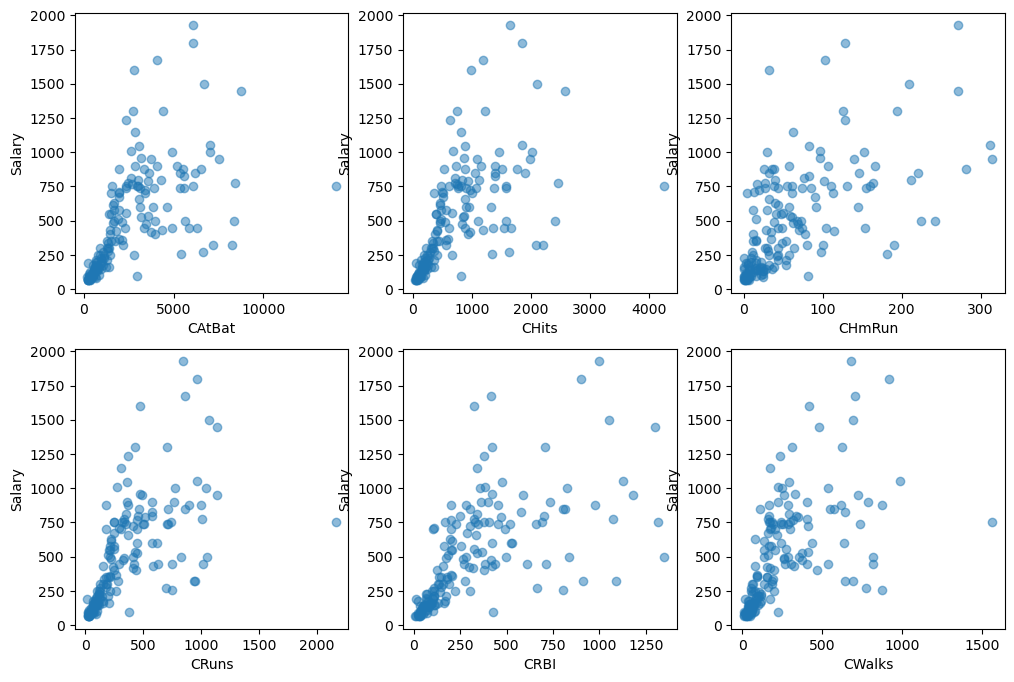

In [11]:
#fillin
import matplotlib.pyplot as plt

career_cols = ['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks']
plt.figure(figsize=(12, 8))

for i, col in enumerate(career_cols):
    plt.subplot(2, 3, i + 1)
    plt.scatter(Train[col], Train['Salary'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Salary')

### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [12]:
#fillin
Train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,164.000000
mean,381.829016,101.549223,10.150259,50.751295,47.093264,38.445596,7.253886,2587.440415,702.222798,59.668394,345.378238,308.373057,248.388601,276.865285,105.300518,8.051813,493.032951
std,145.679181,44.267521,8.228711,24.784284,24.912589,21.136915,4.858712,2285.947344,649.010165,66.449102,322.848870,297.885894,250.777436,262.957701,137.135778,6.783667,386.159522
min,19.000000,7.000000,0.000000,1.000000,2.000000,1.000000,1.000000,41.000000,13.000000,0.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,67.500000
25%,271.000000,68.000000,4.000000,32.000000,29.000000,22.000000,3.000000,730.000000,185.000000,14.000000,98.000000,82.000000,63.000000,109.000000,7.000000,3.000000,160.000000
50%,369.000000,95.000000,8.000000,47.000000,43.000000,34.000000,6.000000,1876.000000,476.000000,36.000000,238.000000,202.000000,166.000000,211.000000,38.000000,6.000000,420.833500
75%,508.000000,136.000000,14.000000,68.000000,61.000000,53.000000,11.000000,3754.000000,1000.000000,78.000000,494.000000,419.000000,332.000000,317.000000,173.000000,12.000000,750.000000
max,687.000000,223.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,315.000000,2165.000000,1348.000000,1566.000000,1320.000000,492.000000,32.000000,1925.571000


### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

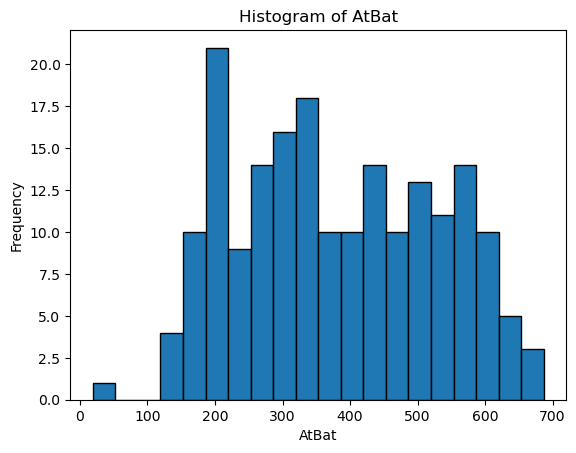

In [13]:
#fillin
plt.hist(Train['AtBat'], bins=20, edgecolor='black')
plt.title('Histogram of AtBat')
plt.xlabel('AtBat')
plt.ylabel('Frequency')
plt.show()

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [18]:
#fillin
Train['AtBat_st'] = (Train['AtBat'] - Train['AtBat'].mean()) / Train['AtBat'].std()

### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [19]:
#fillin
len(Train[Train['AtBat_st'] <= 1])

156

### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

The count for that variable is 164, while the rest are 193, suggesting that Salary is missing entries in almost 30 rows 

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

If missing values are coded as placeholder numbers like -1 or 0 instead of being left blank, then describe() would treat them as real values. So the count would look normal even though those aren't actually valid data points.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

/var/folders/m2/tp3l2_355fs8zglzjqk9g4vh0000gn/T/ipykernel_7235/2424205698.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Train[Train['Salary'].notna()]['AtBat'], Train[Train['Salary'].isna()]['AtBat']],


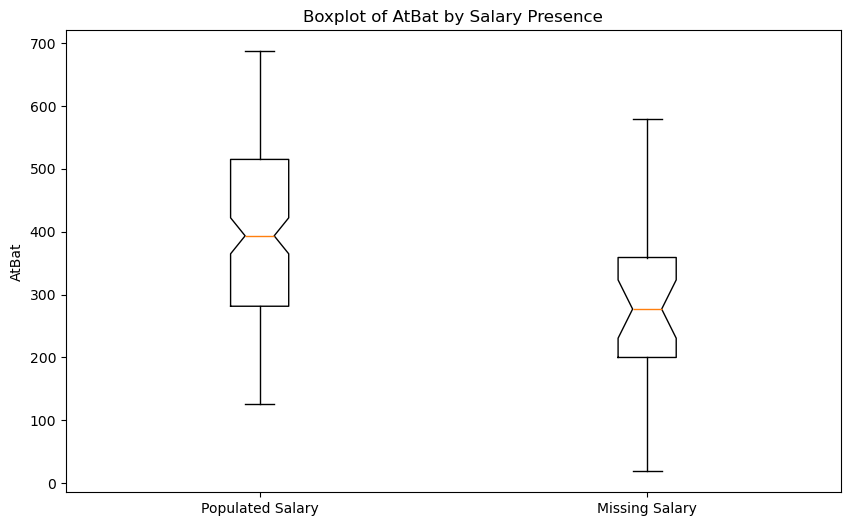

In [25]:
#fillin
plt.figure(figsize=(10, 6))
plt.boxplot([Train[Train['Salary'].notna()]['AtBat'], Train[Train['Salary'].isna()]['AtBat']], 
            labels=['Populated Salary', 'Missing Salary'], 
            notch=True)
plt.title('Boxplot of AtBat by Salary Presence')
plt.ylabel('AtBat')
plt.show()

### Create a correlation matrix for all numeric features in the training set

In [30]:
#fillin
corr_matrix = Train[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']].corr()
corr_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963324,0.540323,0.906579,0.798717,0.631824,-0.039232,0.126602,0.146763,0.150166,0.164892,0.145779,0.056578,0.345879,0.363085,0.368162,0.401390
Hits,0.963324,1.000000,0.516853,0.914739,0.795316,0.605876,-0.028717,0.133316,0.163329,0.136865,0.175542,0.153011,0.065178,0.312858,0.310422,0.301725,0.432558
HmRun,0.540323,0.516853,1.000000,0.618439,0.840613,0.385425,0.009072,0.078981,0.076914,0.411917,0.110767,0.218285,0.080296,0.222084,-0.069088,0.062840,0.326021
Runs,0.906579,0.914739,0.618439,1.000000,0.786635,0.711346,-0.069584,0.083770,0.103859,0.160979,0.159683,0.115628,0.099025,0.289952,0.184714,0.217297,0.441499
RBI,0.798717,0.795316,0.840613,0.786635,1.000000,0.553527,0.046705,0.165837,0.180526,0.375072,0.191452,0.285074,0.117109,0.323825,0.138896,0.217983,0.414623
Walks,0.631824,0.605876,0.385425,0.711346,0.553527,1.000000,0.037943,0.137157,0.147019,0.194766,0.205250,0.167453,0.312812,0.317000,0.139008,0.160753,0.458462
Years,-0.039232,-0.028717,0.009072,-0.069584,0.046705,0.037943,1.000000,0.925308,0.906857,0.730478,0.882559,0.882835,0.836809,0.071301,-0.091915,-0.160476,0.541390
CAtBat,0.126602,0.133316,0.078981,0.083770,0.165837,0.137157,0.925308,1.000000,0.995185,0.775167,0.979705,0.948617,0.894573,0.120875,-0.000507,-0.068187,0.616677
CHits,0.146763,0.163329,0.076914,0.103859,0.180526,0.147019,0.906857,0.995185,1.000000,0.761920,0.983128,0.945002,0.883547,0.132818,-0.003372,-0.062669,0.629875
CHmRun,0.150166,0.136865,0.411917,0.160979,0.375072,0.194766,0.730478,0.775167,0.761920,1.000000,0.782490,0.912134,0.750795,0.126756,-0.129640,-0.141514,0.616170


### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

1: Look at the correlation matrix and find which features are most correlated with Salary (CRuns, CRBI, etc.). Then use one of those to build a simple regression model, train it on players who do have salary data, and use that model to predict what the missing salaries should be.

2: The boxplot clearly shows that players with missing salaries generally have lower AtBat values (median around 270-280) compared to players with populated salaries (median around 390-400). This could be used to split players into groups based on their AtBat values (maybe low, medium, and high ranges) and then fill in missing salaries using the average salary of other players in the same AtBat group. This way it is possible to account for the fact that players with missing salaries are generally lower-performing players.


### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [31]:
TotHits = sum(Train['Hits'])
TotWalks = sum(Train['Walks'])
TotAtBat = sum(Train['AtBat'])

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

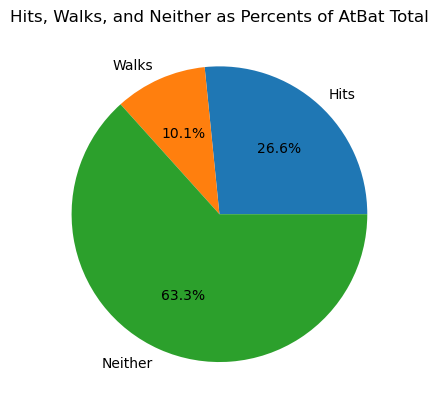

In [32]:
# pie chart
plt.pie(Totals, labels=Labels, autopct='%1.1f%%')
plt.title('Hits, Walks, and Neither as Percents of AtBat Total')
plt.show()


### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [33]:
#fillin
Train['AVG'] = Train['Hits'] / Train['AtBat']

### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [ ]:
Train['AVG_bin'] = 'medium'
Train['AVG_bin'][Train['AVG'] < 0.25] = 'low'
Train['AVG_bin'][Train['AVG'] >= 0.31] = 'high'

/var/folders/m2/tp3l2_355fs8zglzjqk9g4vh0000gn/T/ipykernel_7235/1659924070.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Train['AVG_bin'][Train['AVG'] <= 0.25] = 'low'
/var/folders/m2/tp3l2_355fs8zglzjqk9g4vh0000gn/T/ipykernel_7235/165

### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

<BarContainer object of 3 artists>

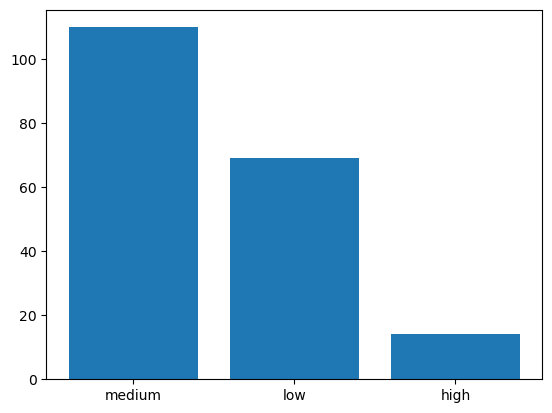

In [41]:
Train['AVG_bin'].value_counts()
plt.bar(Train['AVG_bin'].value_counts().index, Train['AVG_bin'].value_counts().values)

Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [42]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

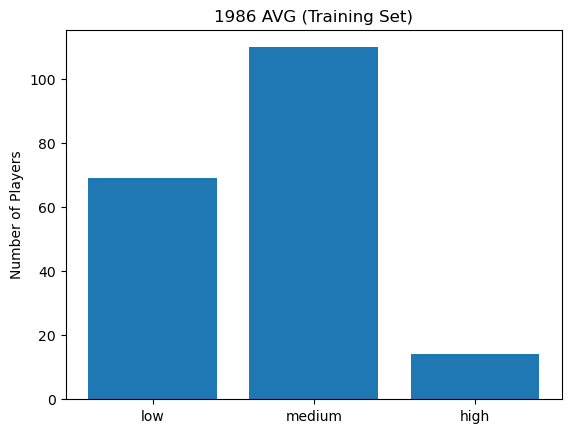

In [43]:
plt.bar(indexMap, reordered_list)

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")

plt.xticks(indexMap)

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

The width method was used for creating the bins, as we used specific values to separate the bins into each category 
(.25 and .31), where values <= .25 were put into the 'low' category, values between .25 and .31 were labeled 'medium', and values >= .31 were labeled 'high'. This differs from depth binning as there the number of values would be used to instead split the bins to be evenly sized.